In [102]:
import pandas as pd
df = pd.read_csv("/home/ubuntu/IntroToML/housing.csv")

In [103]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [105]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [106]:
 df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

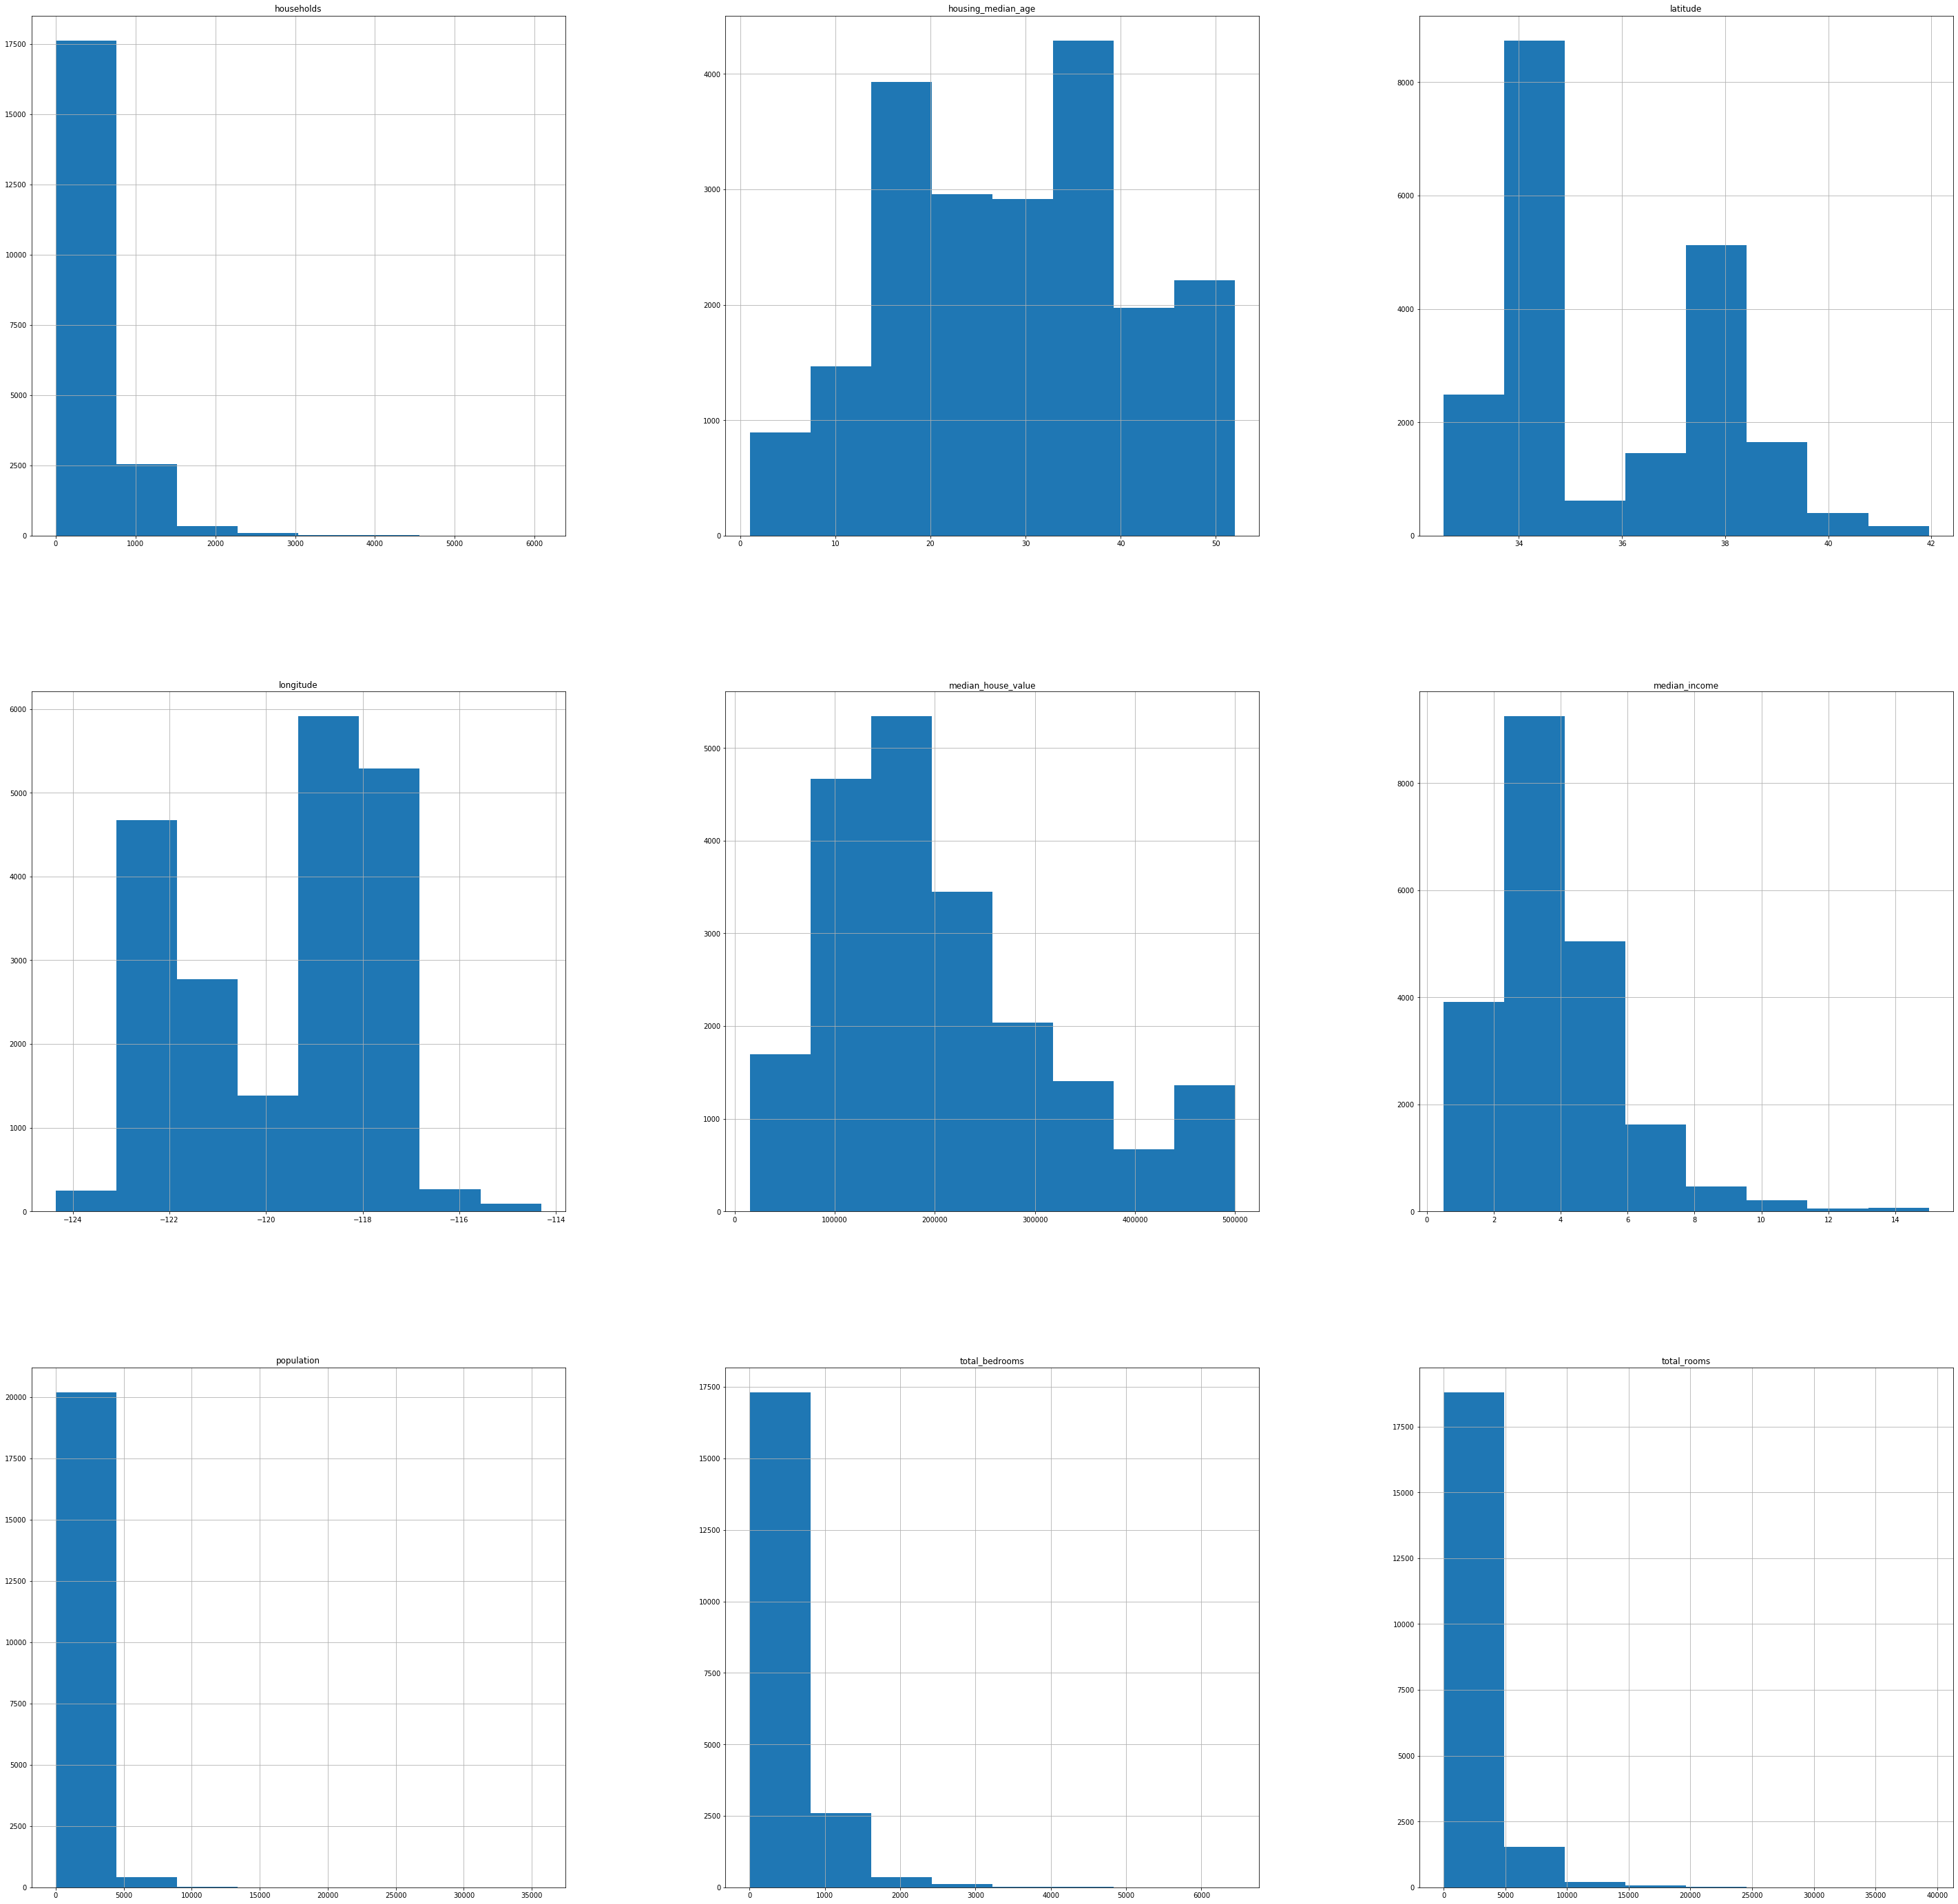

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fb351f750>,
      dtype=object)

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
a=df.hist(bins=8,figsize=(50,50))
plt.show()
a

In [108]:
print(df['median_income'].head(20))
print(df['median_income'].min())
print(df['median_income'].max())

0     8.3252
1     8.3014
2     7.2574
3     5.6431
4     3.8462
5     4.0368
6     3.6591
7     3.1200
8     2.0804
9     3.6912
10    3.2031
11    3.2705
12    3.0750
13    2.6736
14    1.9167
15    2.1250
16    2.7750
17    2.1202
18    1.9911
19    2.6033
Name: median_income, dtype: float64
0.4999
15.0001


In [109]:
import numpy as np
print('\n')
df["income_cat"] = np.ceil(df["median_income"] / 1.5)
print(df['income_cat'].min())
print(df['income_cat'].max())
df["income_cat"].where(df["income_cat"] < 5, 5.0, inplace=True)
df['income_cat'].value_counts()



1.0
11.0


3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [110]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]
    
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fd1302f50>,
      dtype=object)

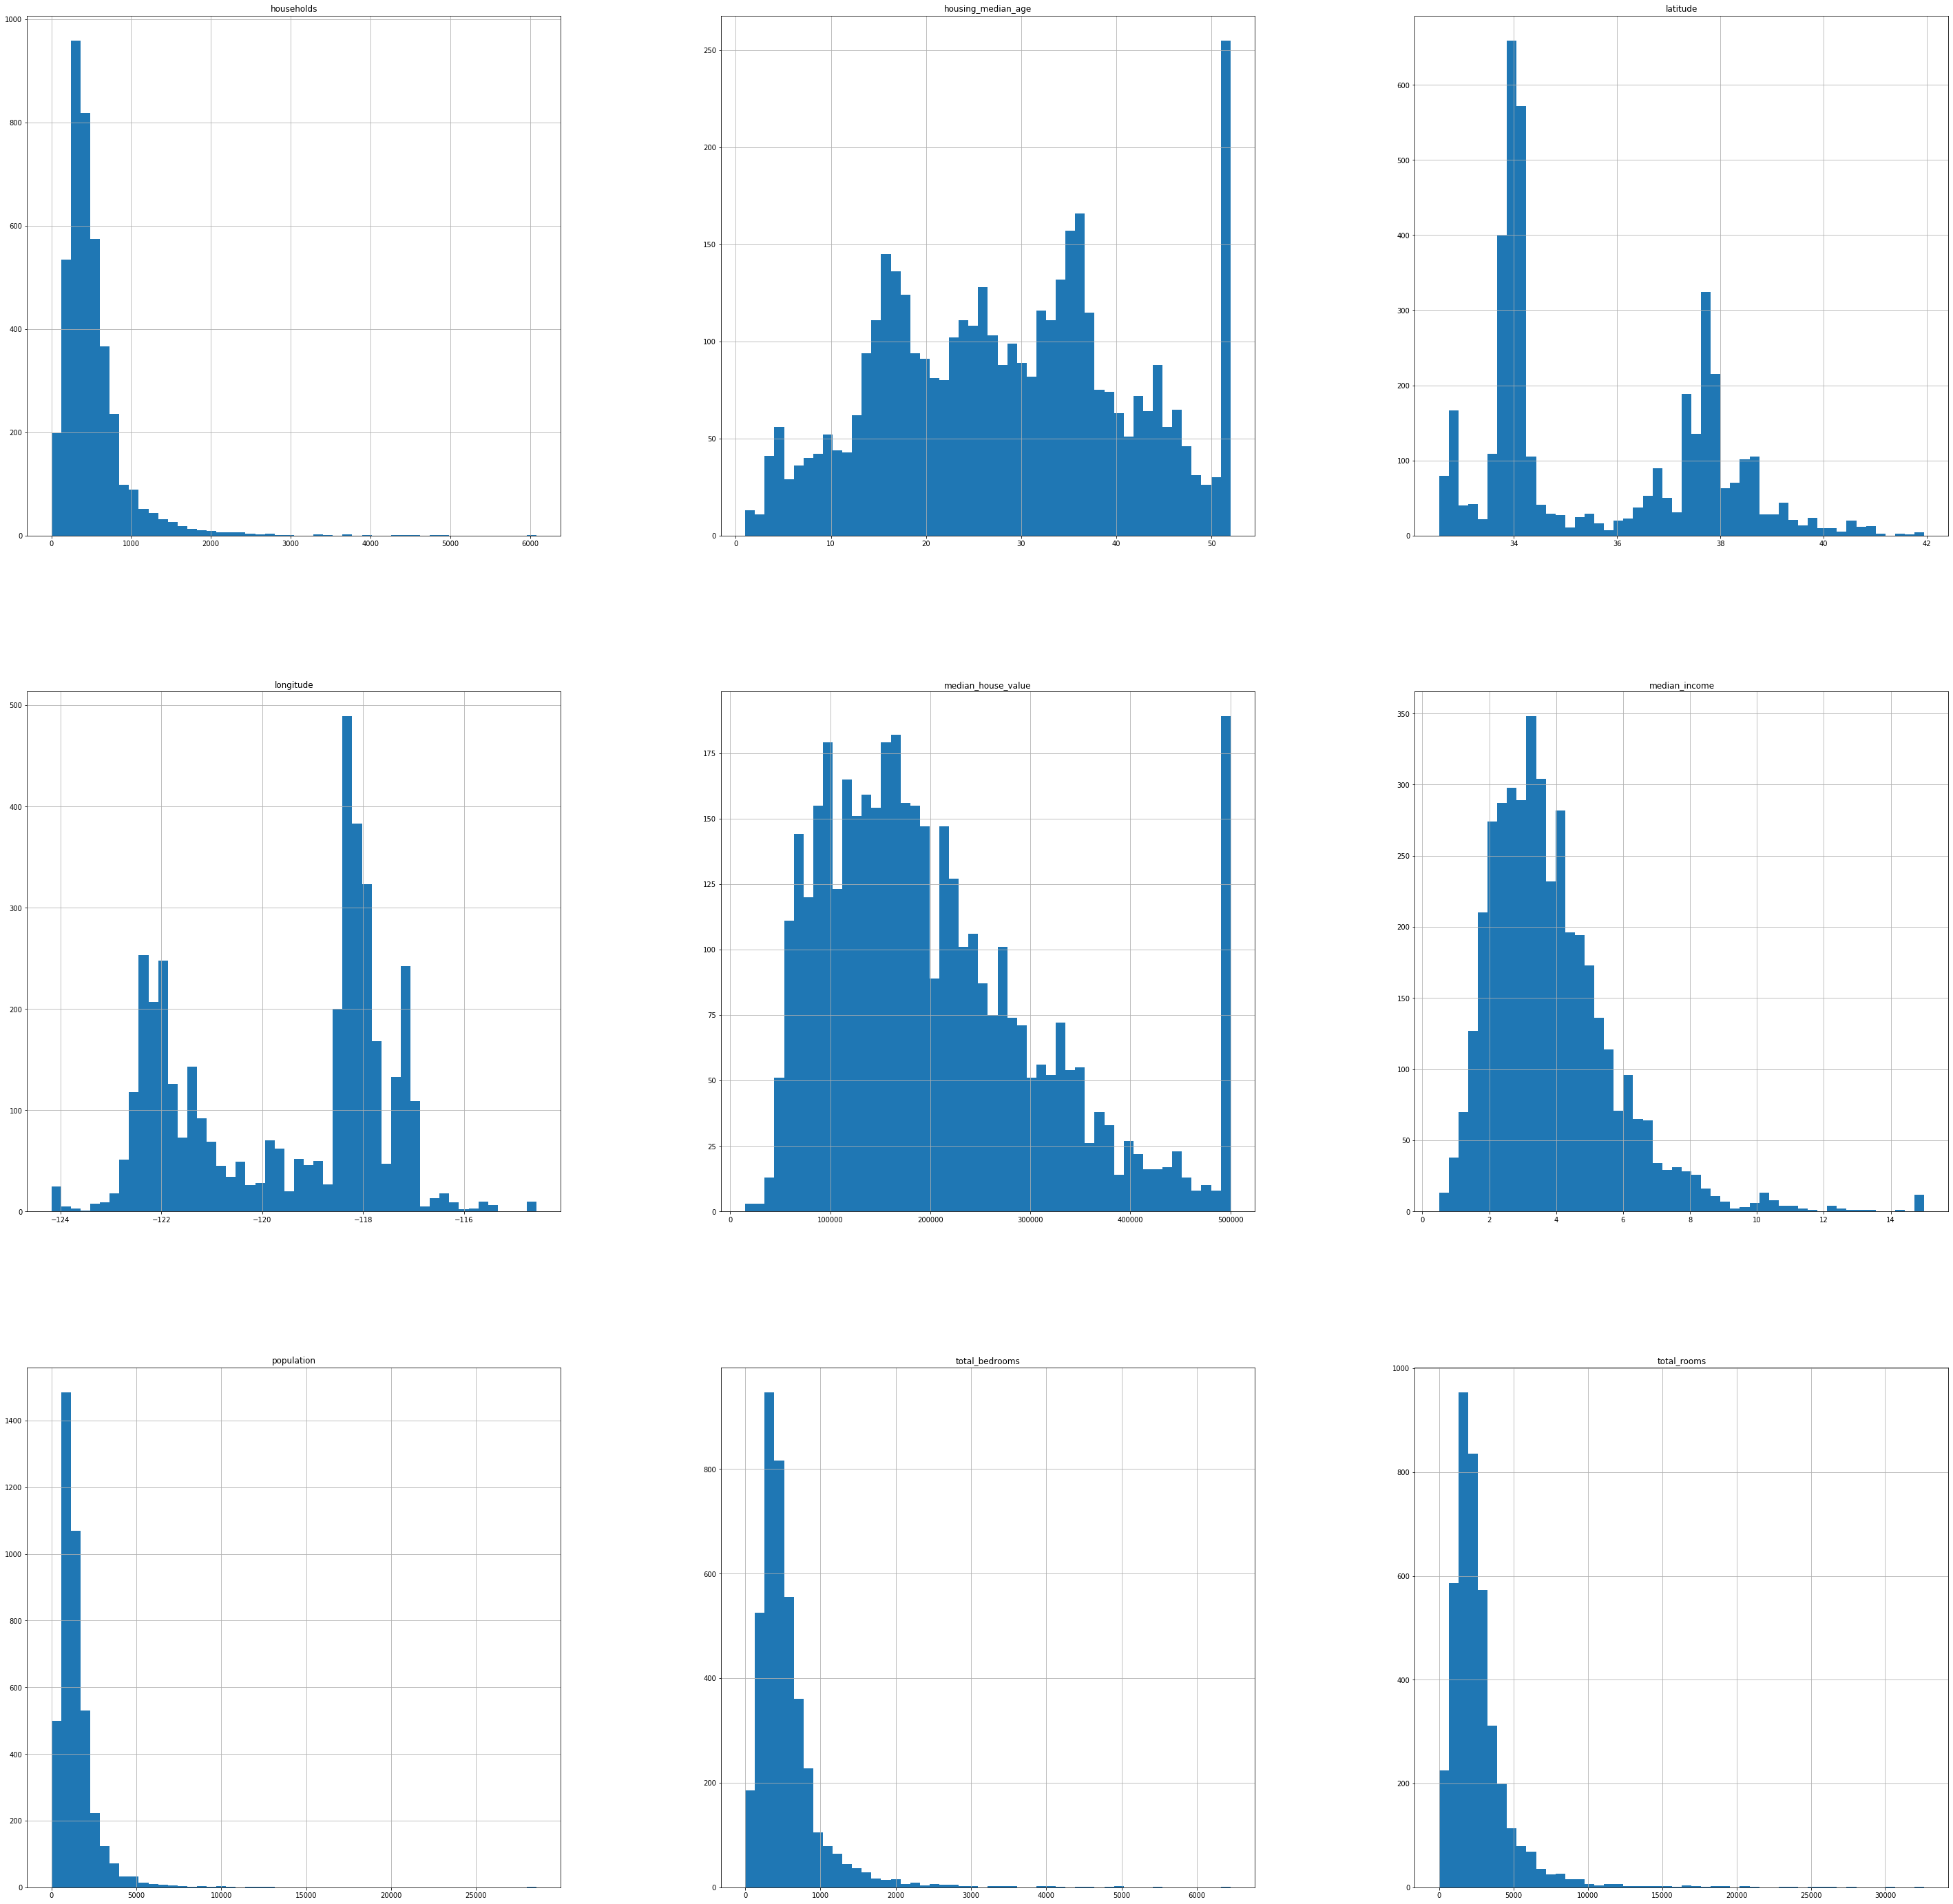

In [111]:
strat_test_set.hist(bins=50,figsize=(50,50))

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
[train,test]= train_test_split(df,test_size=0.2,random_state=42)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fb2adb410>,
      dtype=object)

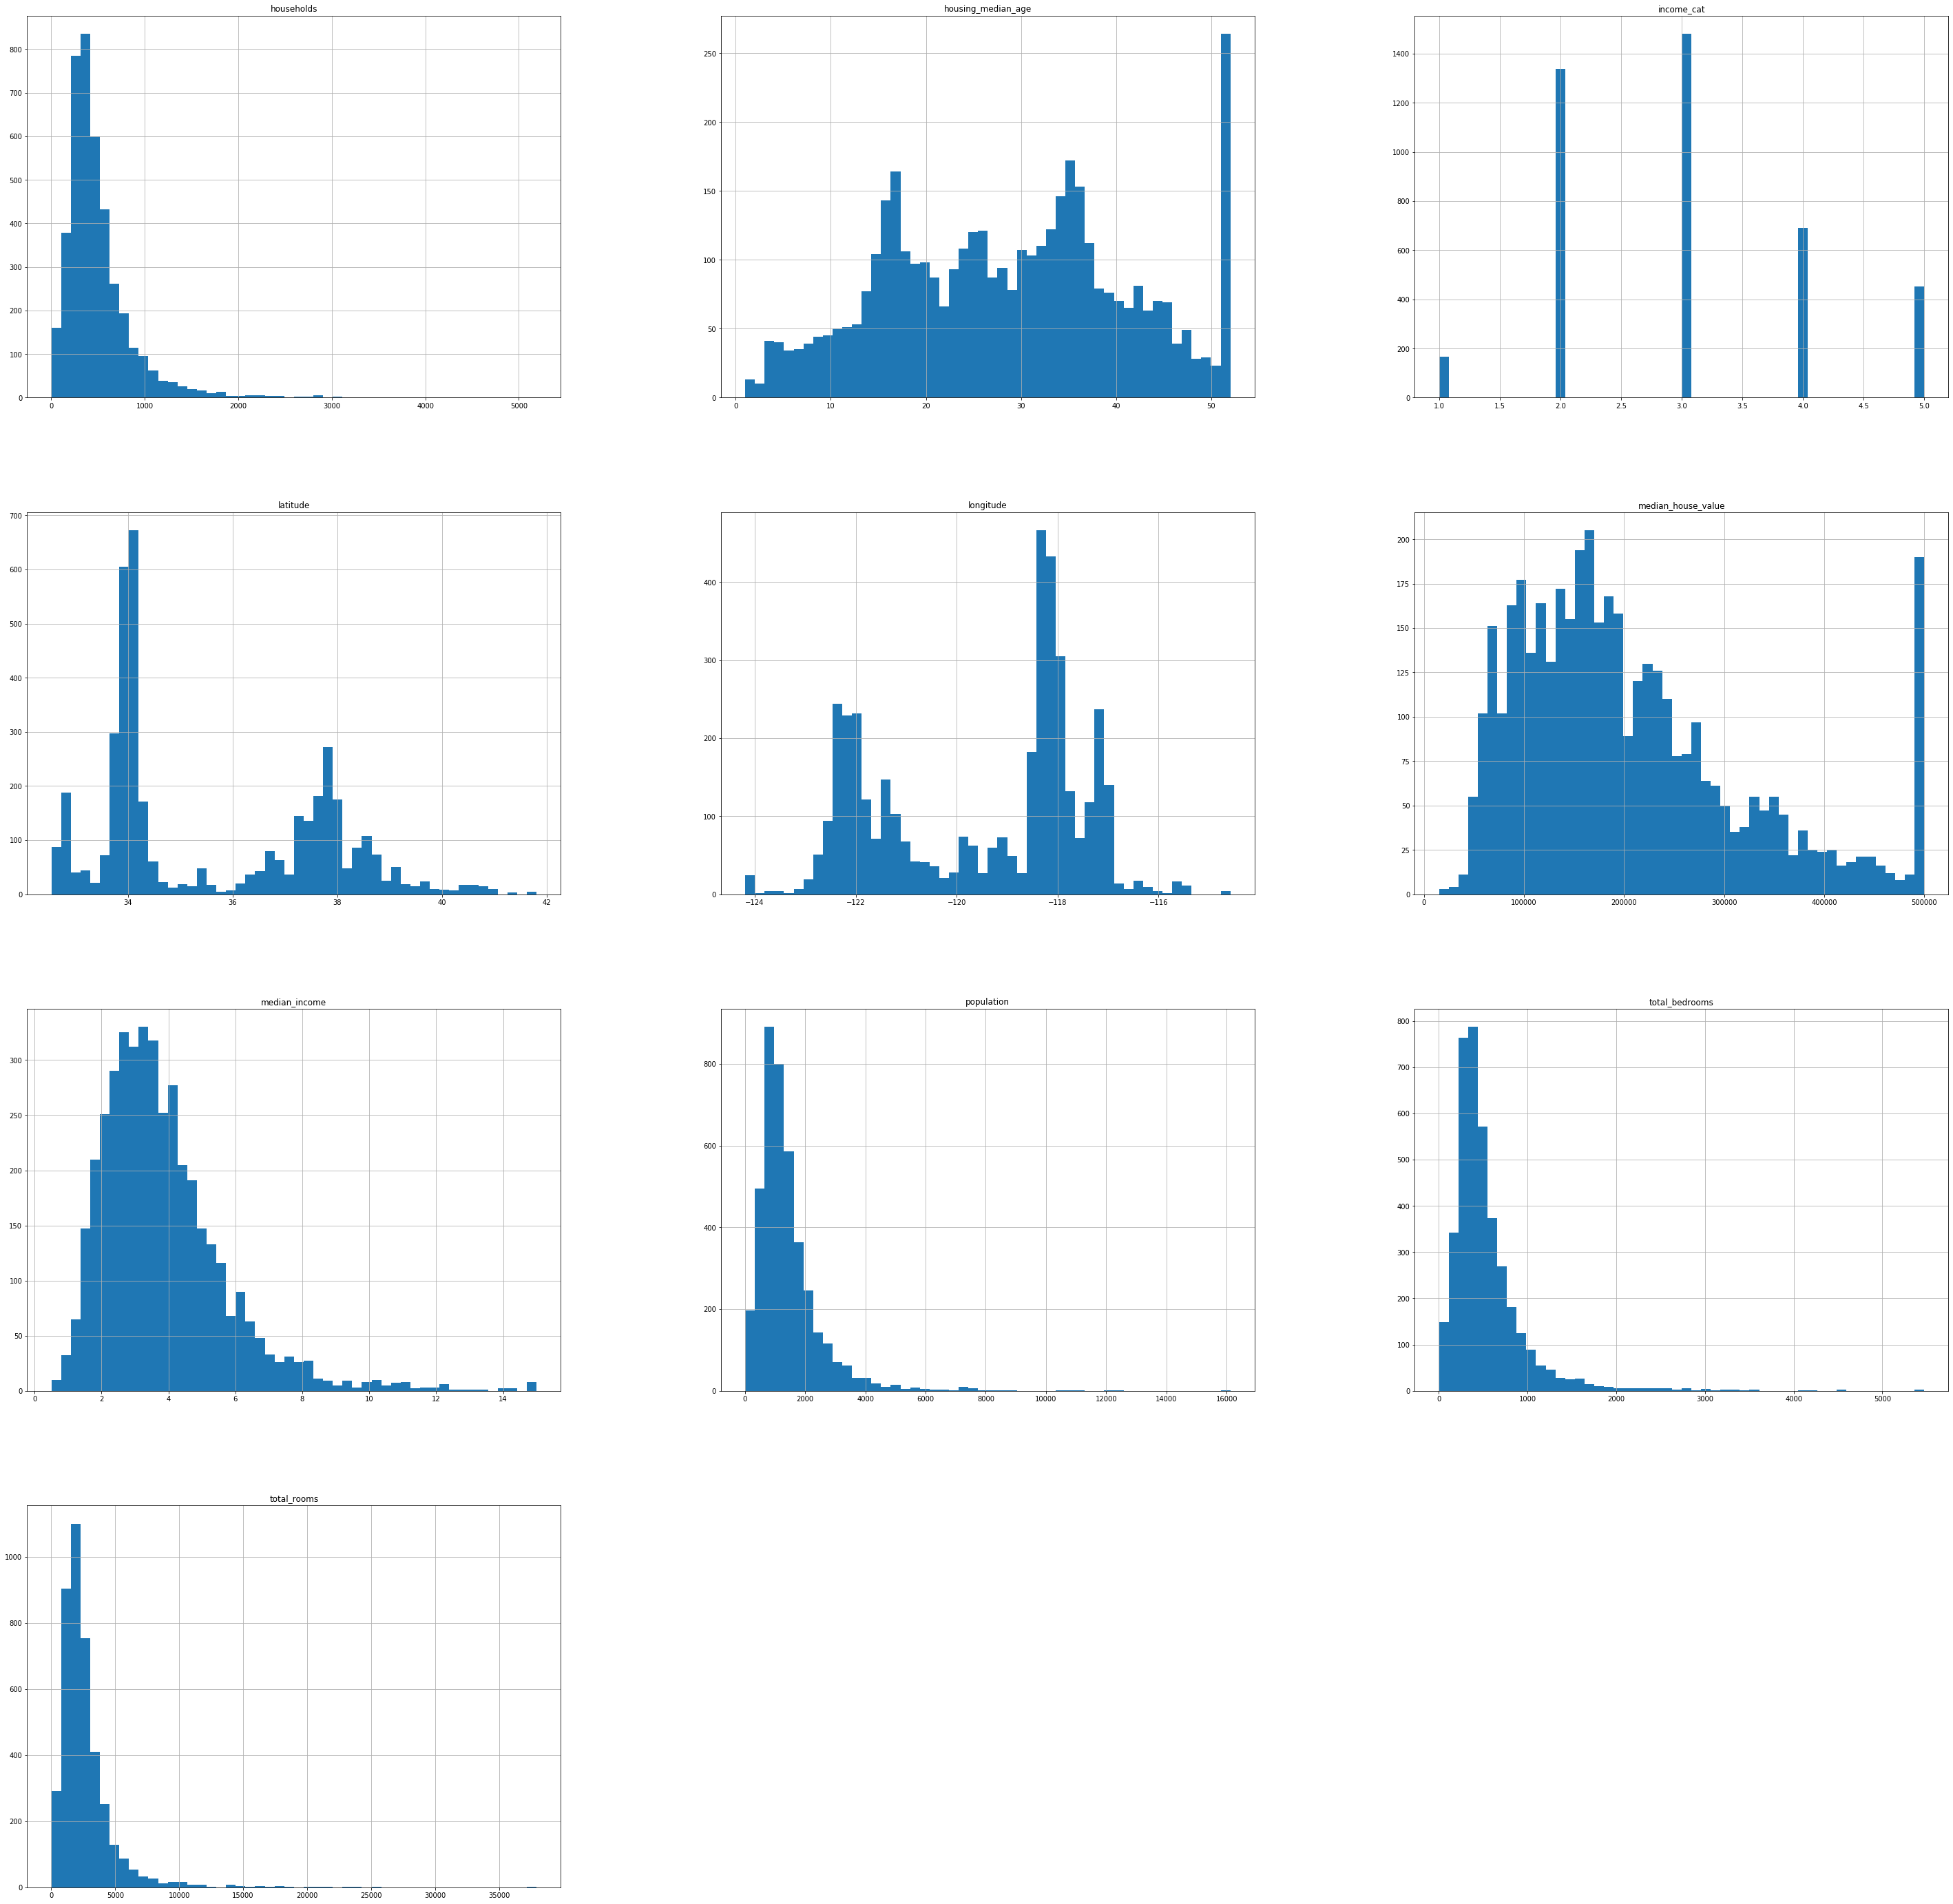

In [113]:
test.hist(bins=50,figsize=(50,50))

In [114]:
train =strat_train_set

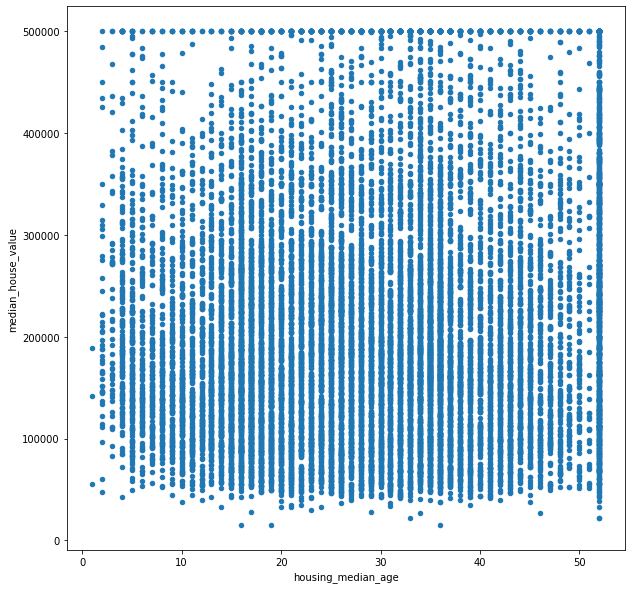

In [115]:
train.plot(kind='scatter', y='median_house_value', x='housing_median_age', figsize=(10,10))

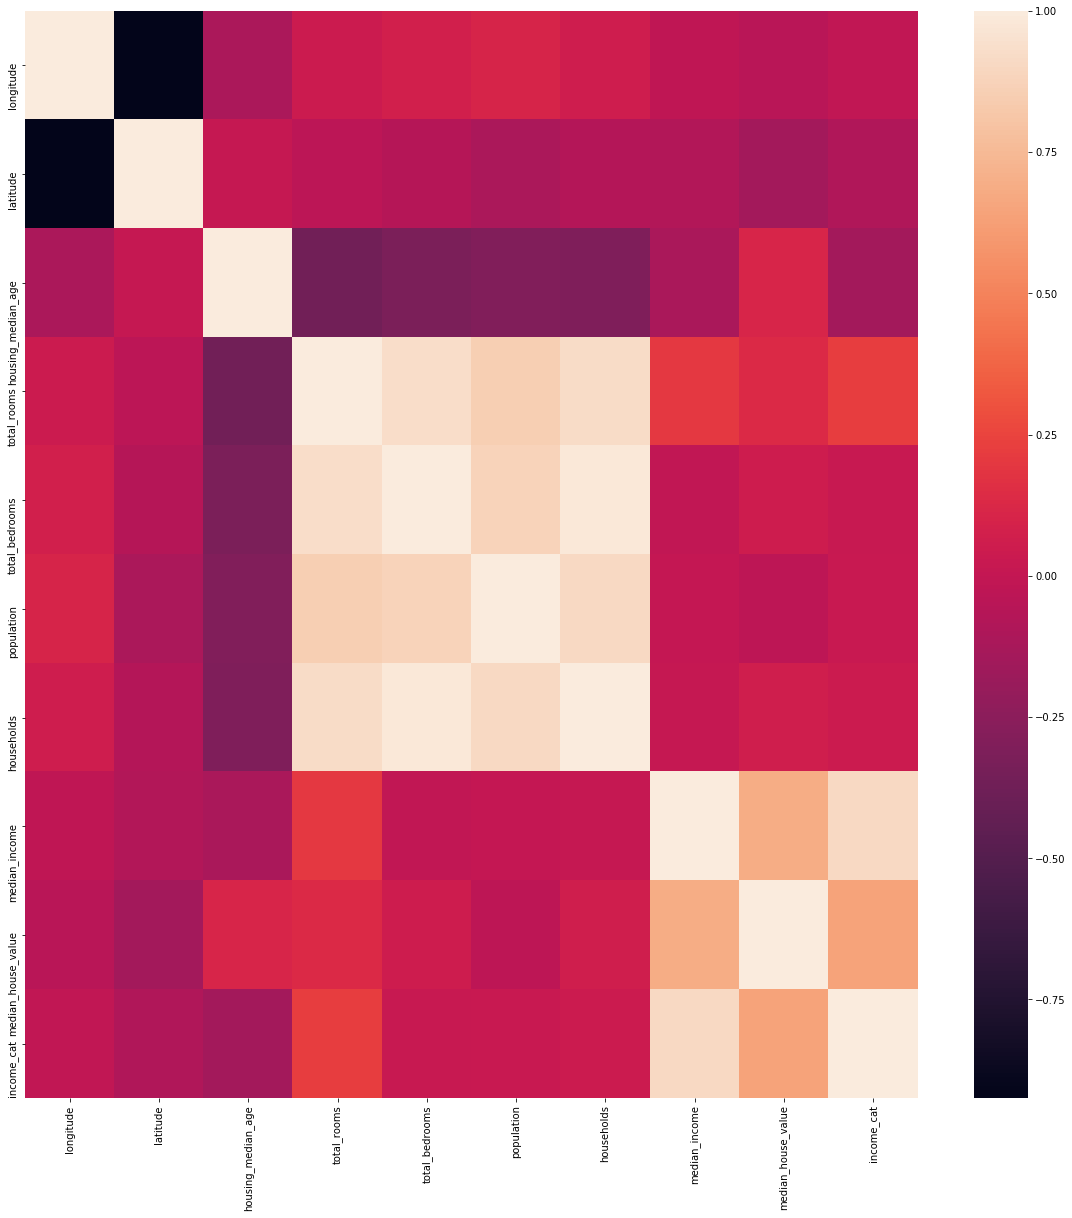

In [116]:
import seaborn as sns
df = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df)#indicates the correlation between features

In [233]:
temp.fillna(method='ffill',inplace=True)
print(temp.shape)
temp

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,C78,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,C105,S
416,1308,3,"Ware, Mr. Frederick",male,38.5,0,0,359309,8.0500,C105,S


In [378]:
temp = pd.read_csv('/home/ubuntu/Machine-Learning-Algorithms/titanic_test.csv')
temp.drop(['Name','Ticket','Sex','Cabin','Embarked'],axis=1,inplace=True)
print(temp[20:35])
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(temp)
temp1=imputer.transform(temp)
temp = pd.DataFrame(temp1,columns=temp.columns)
print(temp[20:35])

    PassengerId  Pclass   Age  SibSp  Parch      Fare
20          912       1  55.0      1      0   59.4000
21          913       3   9.0      0      1    3.1708
22          914       1   NaN      0      0   31.6833
23          915       1  21.0      0      1   61.3792
24          916       1  48.0      1      3  262.3750
25          917       3  50.0      1      0   14.5000
26          918       1  22.0      0      1   61.9792
27          919       3  22.5      0      0    7.2250
28          920       1  41.0      0      0   30.5000
29          921       3   NaN      2      0   21.6792
30          922       2  50.0      1      0   26.0000
31          923       2  24.0      2      0   31.5000
32          924       3  33.0      1      2   20.5750
33          925       3   NaN      1      2   23.4500
34          926       1  30.0      1      0   57.7500
    PassengerId  Pclass       Age  SibSp  Parch      Fare
20        912.0     1.0  55.00000    1.0    0.0   59.4000
21        913.0     